# K Nearest Neighbours with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based on of the features.

Let's grab it and use it!

In [1]:
# modules we will use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('Classified Data',header=0,index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
df.shape

(1000, 11)

In [6]:
#checking if there any missing values or not
df.isnull().mean()

WTT             0.0
PTI             0.0
EQW             0.0
SBI             0.0
LQE             0.0
QWG             0.0
FDJ             0.0
PJF             0.0
HQE             0.0
NXJ             0.0
TARGET CLASS    0.0
dtype: float64

In [7]:
#checking the data types of the features
df.dtypes

WTT             float64
PTI             float64
EQW             float64
SBI             float64
LQE             float64
QWG             float64
FDJ             float64
PJF             float64
HQE             float64
NXJ             float64
TARGET CLASS      int64
dtype: object

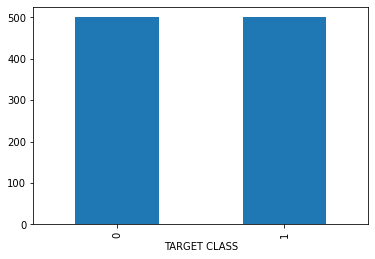

In [9]:
#check the dataset is balanced or not
df.groupby('TARGET CLASS')['TARGET CLASS'].count().plot.bar()

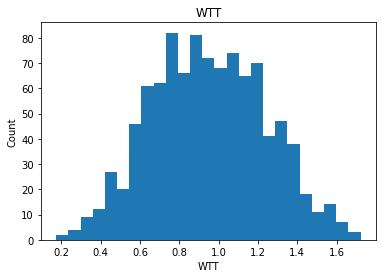

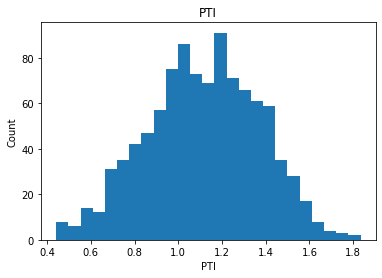

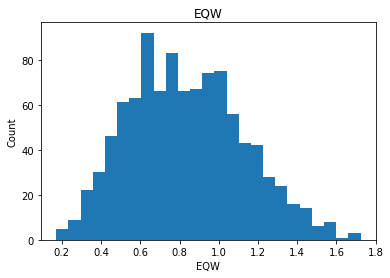

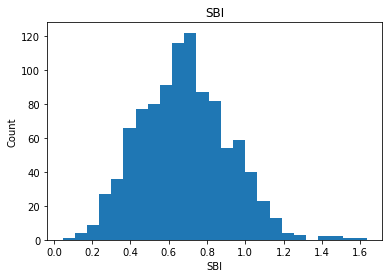

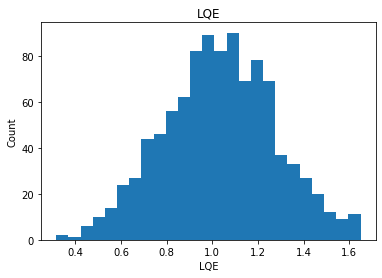

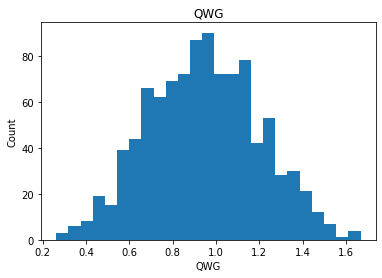

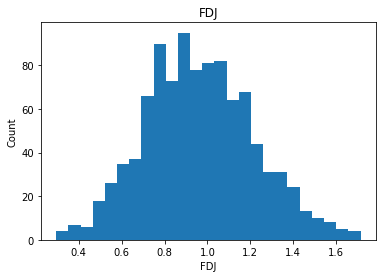

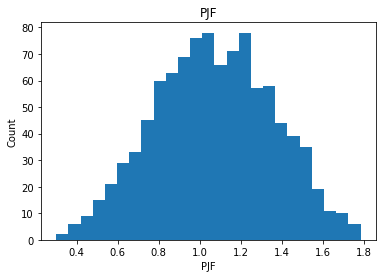

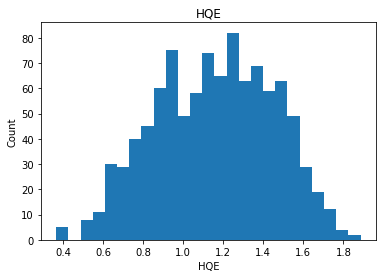

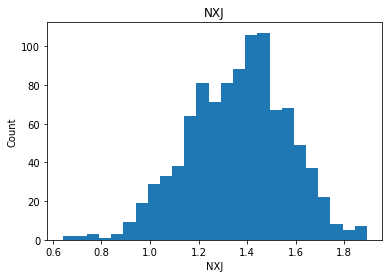

In [11]:
#Let's check the distribution of feature columns
for feature in df.columns[:-1]:
    plt.hist(df[feature],bins=25)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

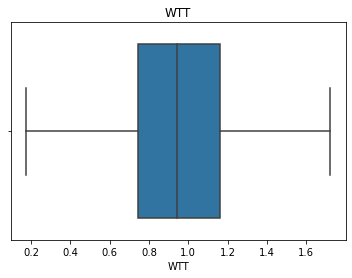

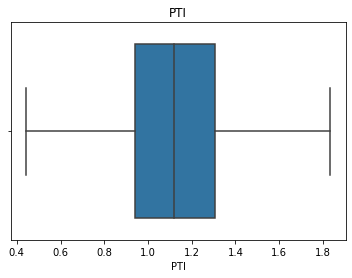

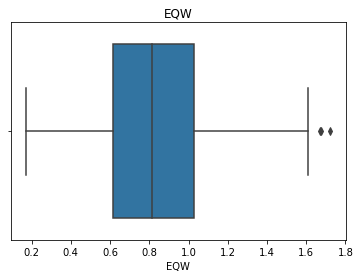

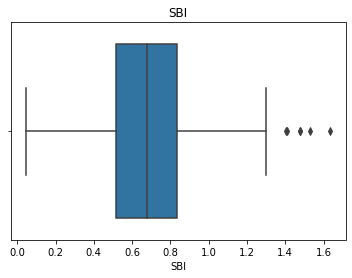

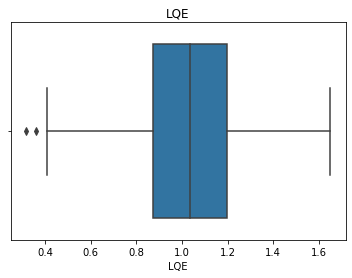

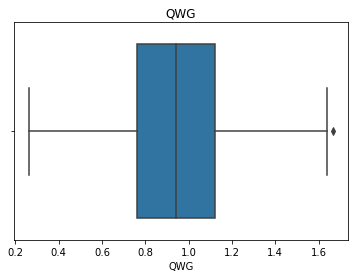

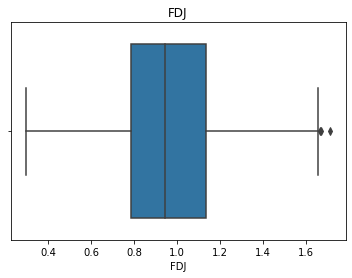

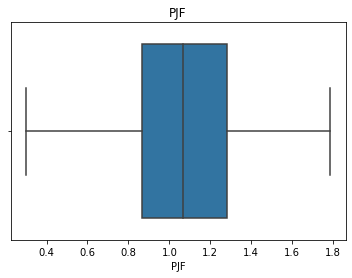

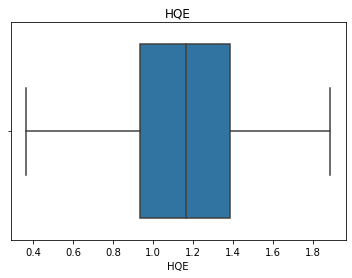

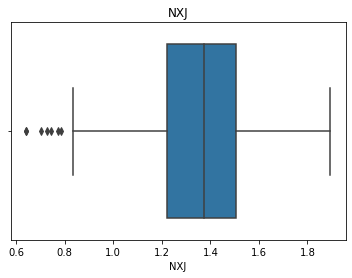

In [13]:
#Let's check the outliers in our dataset
for feature in df.columns[:-1]:
    box = sns.boxplot(df[feature])
    box.set_title(feature)
    plt.show()

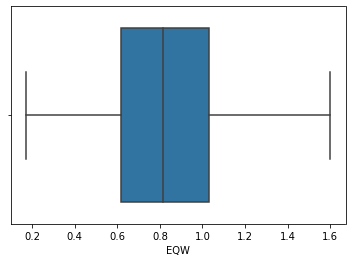

In [16]:
# Handling Outliers
df.loc[df['EQW']>1.6,'EQW'] = 1.6
sns.boxplot(df['EQW'])

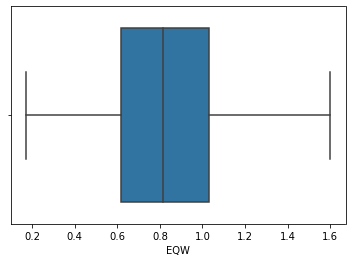

In [17]:
df.loc[df['SBI']>1.3,'SBI'] = 1.3
sns.boxplot(df['EQW'])

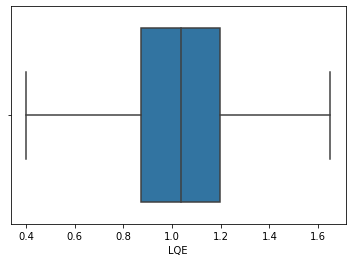

In [18]:
df.loc[df['LQE']<0.4,'LQE'] = 0.4
sns.boxplot(df['LQE'])

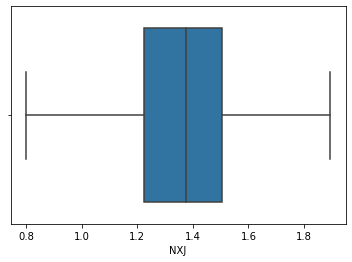

In [20]:
df.loc[df['NXJ']<0.8,'NXJ'] = 0.8
sns.boxplot(df['NXJ'])

In [21]:
## Columns QWG, FDJ have not much impact of outliers so need not to be handled.

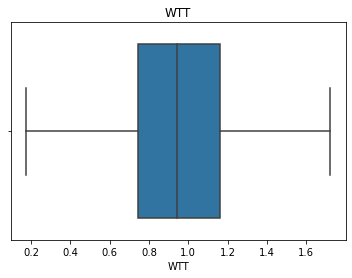

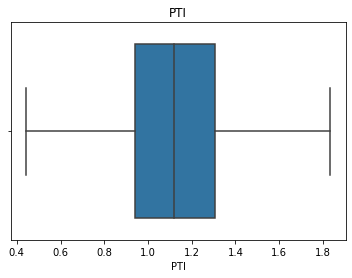

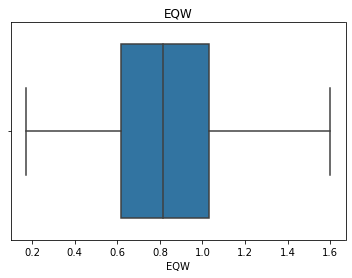

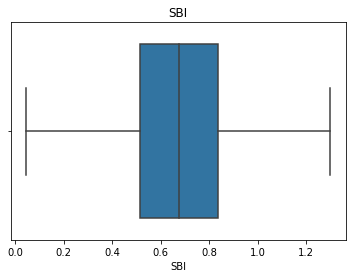

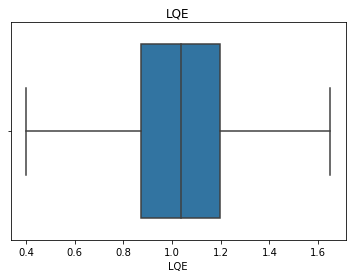

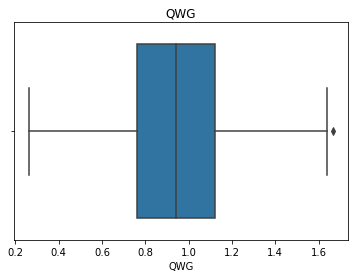

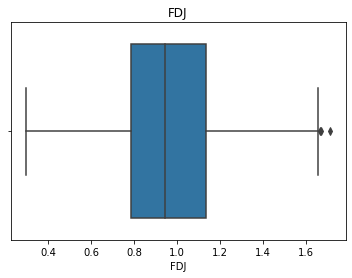

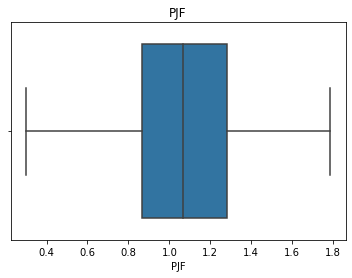

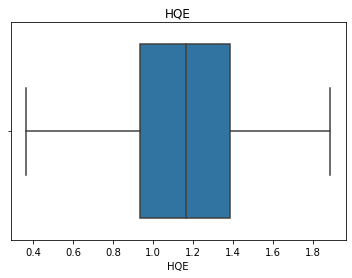

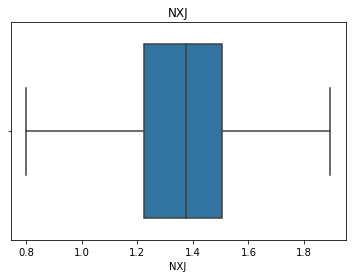

In [22]:
for feature in df.columns[:-1]:
    box = sns.boxplot(df[feature])
    box.set_title(feature)
    plt.show()

In [23]:
## We have handled the outliers in our data

In [24]:
## Lets do standardization of our dataset
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()

In [28]:
sd_data = sd.fit_transform( df.drop(['TARGET CLASS'],axis=1) )
sd_data

array([[-0.12354188,  0.18590747, -0.91490622, ..., -1.48236813,
        -0.9497194 , -0.65198556],
       [-1.08483602, -0.43034845, -1.02708619, ..., -0.20224031,
        -1.82805088,  0.63953242],
       [-0.78870217,  0.33931821,  0.30326446, ...,  0.28570652,
        -0.68249379, -0.38414766],
       ...,
       [ 0.64177714, -0.51308341, -0.17872925, ..., -2.36249443,
        -0.81426092,  0.10967485],
       [ 0.46707241, -0.98278576, -1.4681354 , ..., -0.03677699,
         0.40602453, -0.86623998],
       [-0.38765353, -0.59589427, -1.43425009, ..., -0.56778932,
         0.3369971 ,  0.00752305]])

In [31]:
train_data = pd.DataFrame(sd_data)
train_data.columns = df.columns[:-1]

In [32]:
train_data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.914906,0.329754,-1.035631,-2.308375,-0.798951,-1.482368,-0.949719,-0.651986
1,-1.084836,-0.430348,-1.027086,0.640411,-0.446001,-1.152706,-1.129797,-0.202240,-1.828051,0.639532
2,-0.788702,0.339318,0.303264,0.772986,2.034072,-0.870156,2.599818,0.285707,-0.682494,-0.384148
3,0.982841,1.060193,-0.622098,0.640321,0.452947,-0.267220,1.750208,1.066491,1.241325,-1.039089
4,1.139275,-0.640392,-0.710753,-0.053087,0.823541,-0.936773,0.596782,-1.472352,1.040772,0.276063
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.066288,-0.258993,0.017073,-1.395721,-0.849486,-2.604264,-0.139347,-0.073144
996,-1.292453,-0.616901,0.371547,0.495384,1.571611,1.273495,0.362784,-1.242110,-0.679746,1.483703
997,0.641777,-0.513083,-0.178729,1.043635,-0.540992,-0.229680,-2.261339,-2.362494,-0.814261,0.109675
998,0.467072,-0.982786,-1.468135,-0.067606,2.371526,0.001269,-0.422041,-0.036777,0.406025,-0.866240


In [33]:
#train test split
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(train_data,df['TARGET CLASS'],
                                                    test_size=0.30)

In [35]:
# Using KNN 

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)  #we will use K=1 for now
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [38]:
pred = knn.predict(X_test)

In [39]:
## import evluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(confusion_matrix(y_test,pred))

[[137  13]
 [ 12 138]]


In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       150
           1       0.91      0.92      0.92       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [43]:
# Lets use the value of K from 1 to 50 and calculate error rate for each K value
# select the value of K which has lowest error rate

In [48]:
error_rate = []

for K in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=K)  
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error = np.mean(pred != y_test)
    error_rate.append(error)

In [50]:
len(error_rate)

50

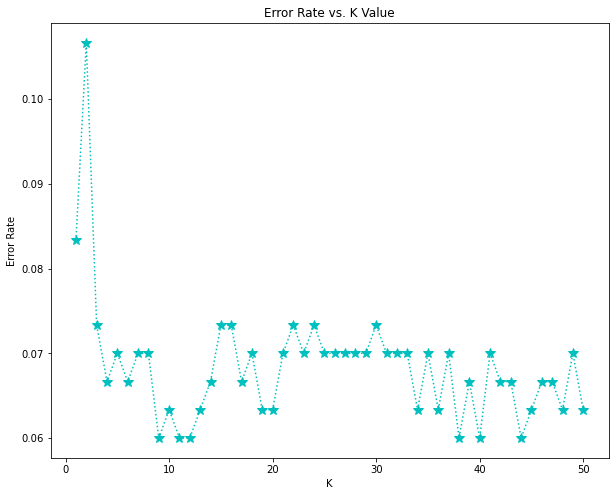

In [60]:
plt.figure(figsize=(10,8))
plt.plot(range(1,51), error_rate, color='c', linestyle='dotted', marker='*', markerfacecolor='c', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

From above plot we can see that lowest error value is 0.06 and second lowest value is around 0.065
I will be using K=10 because if we consider points which has least error rate, It may cause
the overfitting in the data

In [63]:
knn = KNeighborsClassifier(n_neighbors=10)  
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('Confusion Matrix \n')
print(confusion_matrix(y_test,pred))
print('\n Classification Report \n',classification_report(y_test,pred))

Confusion Matrix 

[[140  10]
 [  9 141]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       150
           1       0.93      0.94      0.94       150

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [64]:
## Our final model is ready 